### 空氣品質指標AQI的定義
空氣品質指標為依據監測資料將當日空氣中臭氧 (O3)、細懸浮微粒 (PM2.5)、懸浮微粒 (PM10)、一氧化碳 (CO)、二氧化硫 (SO2) 及二氧化氮 (NO2) 濃度等數值，以其對人體健康的影響程度，分別換算出不同污染物之副指標值，再以當日各副指標之最大值為該測站當日之空氣品質指標值 (AQI)。

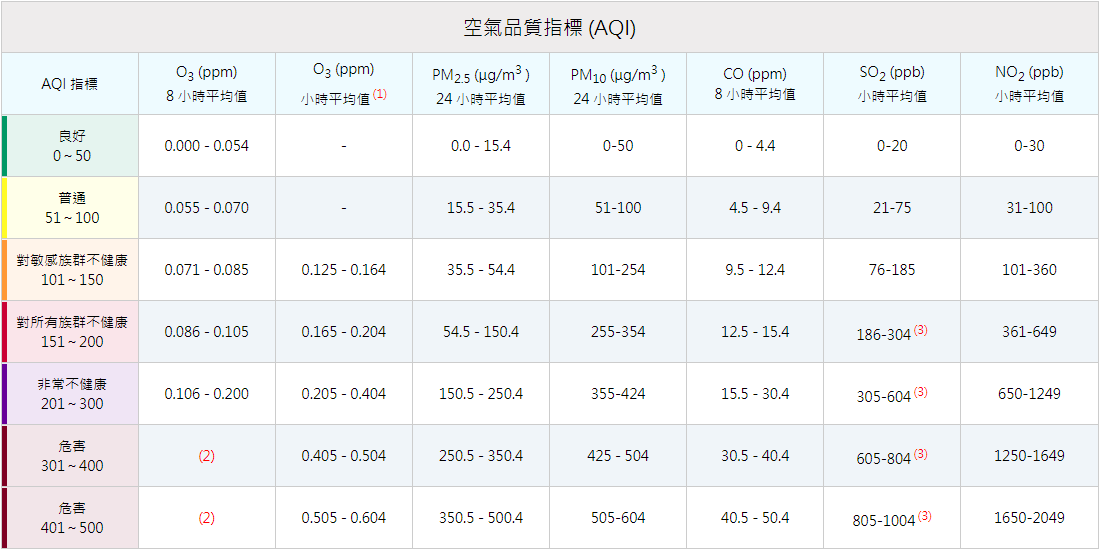

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('200811-201811.csv')

In [4]:
df.head(10)

,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity
0,4.4,0.47,32.2,31,24,3.46,20.84,2.309,0.231,2.078,1.91,24.86,77.11
1,6.4,0.52,30.2,32,32,5.64,26.30,2.186,0.227,1.959,1.72,26.58,71.93
2,3.2,0.45,30.5,46,20,2.36,18.05,0.000,0.000,0.000,2.08,24.75,76.33
3,5.2,0.47,32.5,38,24,3.18,20.64,2.374,0.225,2.150,1.66,24.97,79.97
4,4.5,0.72,29.9,32,29,5.43,23.82,2.290,0.287,2.004,1.03,26.18,73.78
5,3.7,0.48,35.3,30,21,2.20,18.95,2.202,0.179,2.023,2.08,24.58,79.22
6,4.8,0.63,30.4,34,31,5.94,25.24,2.233,0.228,2.005,1.78,25.64,72.95
7,2.9,0.56,33.1,35,26,2.96,23.17,2.287,0.252,2.035,1.55,25.85,70.83
8,3.0,0.45,31.2,40,22,3.81,17.81,2.188,0.213,1.975,1.89,24.49,77.84
9,1.8,0.35,33.1,24,10,1.54,8.22,0.000,0.000,0.000,0.96,25.25,76.11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SO2        1447 non-null   float64
 1   CO         1447 non-null   float64
 2   O3         1447 non-null   float64
 3   PM25       1447 non-null   int64  
 4   Nox        1447 non-null   int64  
 5   NO         1447 non-null   float64
 6   NO2        1447 non-null   float64
 7   THC        1447 non-null   float64
 8   NMHC       1447 non-null   float64
 9   CH4        1447 non-null   float64
 10  WindSpeed  1447 non-null   float64
 11  TEMP       1447 non-null   float64
 12  Humidity   1447 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 147.1 KB


SO2(二氧化硫(ppb))、CO(一氧化碳(ppm))、O3(臭氧(ppb))、PM2.5(細懸浮微粒(μg/m3))、NOx(氮氧化物(ppb))、NO(一氧化氮(ppb))、NO2(二氧化氮(ppb))、THC(總碳氫化物)、NMHC非碳氫化物、CH4(碳氫化物)、WindSpeed(風速(m/sec))、溫度、濕度

In [6]:
df.describe()

,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,5.393780,0.475073,28.741811,34.408431,22.619903,4.491175,18.124202,1.464091,0.148995,1.315270,0.944368,12.400663,74.314603
std,2.455167,0.181656,7.819648,16.745091,9.629188,2.618546,7.484773,1.005049,0.130524,0.899127,0.994151,13.162018,4.737597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.700000,0.340000,22.900000,21.000000,16.000000,2.710000,12.395000,0.000000,0.000000,0.000000,0.000000,0.000000,71.595000
50%,4.900000,0.470000,28.200000,35.000000,21.000000,3.940000,17.360000,2.017000,0.156000,1.845000,0.820000,0.000000,74.390000
75%,6.600000,0.580000,33.400000,47.000000,28.000000,5.525000,23.510000,2.201500,0.233000,1.971000,1.935000,26.630000,77.375000
max,17.100000,1.230000,58.500000,79.000000,56.000000,18.200000,40.310000,2.760000,0.753000,2.260000,2.940000,31.330000,90.260000


In [7]:
#檢查是否有空值
df.isna().sum()

SO2          0
CO           0
O3           0
PM25         0
Nox          0
NO           0
NO2          0
THC          0
NMHC         0
CH4          0
WindSpeed    0
TEMP         0
Humidity     0
dtype: int64

In [8]:
df.groupby('PM25').mean()

,SO2,CO,O3,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity
PM25,,,,,,,,,,,,
0,4.500000,0.321429,24.950000,15.428571,2.981429,12.559286,1.366429,0.110214,1.256429,1.105000,15.676429,71.358571
3,3.050000,0.190000,19.550000,9.000000,2.700000,6.105000,0.912500,0.036000,0.876500,1.600000,28.910000,78.635000
4,2.700000,0.235000,21.200000,11.500000,2.270000,8.850000,0.000000,0.000000,0.000000,2.455000,29.175000,80.675000
5,2.400000,0.215000,22.650000,8.500000,2.365000,6.555000,0.000000,0.000000,0.000000,1.910000,28.865000,80.055000
6,4.414286,0.297143,17.200000,15.285714,4.614286,10.758571,1.126000,0.090857,1.035286,2.125714,30.020000,75.968571
...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.000000,0.730000,28.200000,38.000000,7.880000,30.230000,2.430000,0.307000,2.122000,0.000000,0.000000,71.620000
75,6.360000,0.764000,28.200000,35.200000,7.592000,27.438000,1.459600,0.239400,1.220400,0.000000,0.000000,71.200000
76,6.950000,0.695000,31.600000,32.000000,5.355000,26.385000,2.234000,0.276000,1.958000,0.000000,0.000000,72.890000


In [21]:
pm25_target = df['PM25']

In [22]:
pm25_data = df.drop(columns = ['PM25'])

In [23]:
feature_names = pm25_data.columns
feature_names

Index(['SO2', 'CO', 'O3', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity'],
      dtype='object')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(pm25_data, pm25_target, test_size=0.3, random_state=87)

In [27]:
regr = LinearRegression()

In [28]:
regr.fit(x_train, y_train)

LinearRegression()

In [29]:
y_predict = regr.predict(x_test)

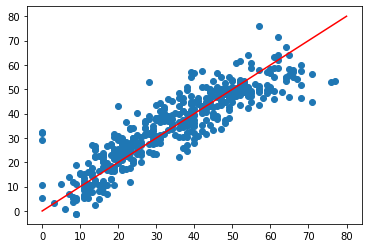

In [34]:
plt.scatter(y_test, y_predict)
plt.plot([0,80],[0,80],'r')

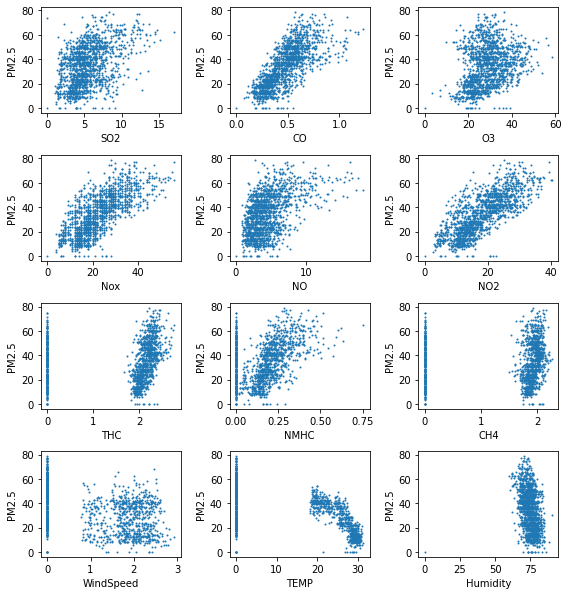

In [38]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(feature_names):
    plt.subplot(5, 3, i+1)
    plt.scatter(pm25_data.values[:,i], pm25_target.values, s=1) #將使用DataFrame.values屬性以返回給定DataFrame的numpy表示形式
    plt.ylabel("PM2.5")
    plt.xlabel(feature)
    plt.tight_layout()

In [48]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df1 = df.head(20)

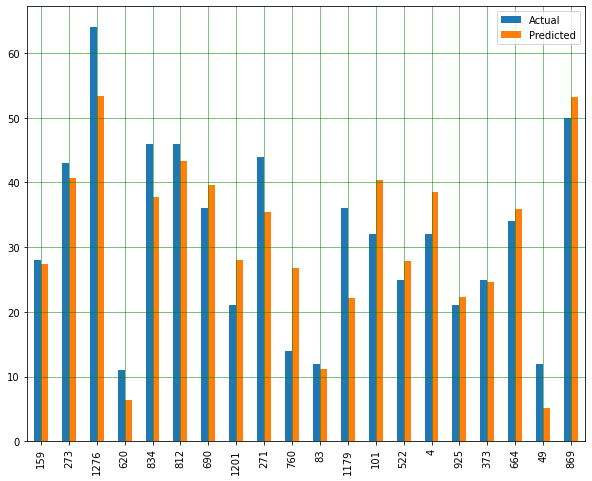

In [49]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<AxesSubplot:xlabel='PM25', ylabel='Count'>

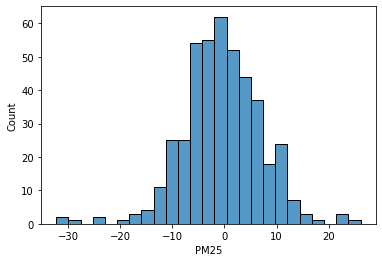

In [51]:
sns.histplot((y_test-y_predict))